# Assignment 2

To be delivered until 2024/12/23 23:59:59.

## 1) Arduino

You will start by setting up a series of connections in order to extract some data with the Arduino. First make the connections as shown below. **Mind the direction of the temperature sensor. If you have an incorrect position, you will be connection the power to the ground and vice-versa and you will damage the sensor.** The photoresistor sensor on the other hand has no polarity.

<img src="temp_photo_cropped.png" width=1000/>

On this problem, you will read temperature and luminance from the sensors and print them on the serial.

**1)** Code an Arduino sketch, where the value of temperature and luminance are printed to the serial. For each serial print that you make, print the value of temperature, then a semicolon, then the value of luminance with a new line (use no whitespaces). You can do this by using three separate `Serial.print`, with the last one being a `Serial.println`. Print values 5 times per second (use the delay function to control this). Manually influence the readings of the sensors, by covering the photoresistor or shining light on it, and by lightly and carefully touching the temperature sensor to increase its temperature readings.

**Note that the temperature sensor appears not to be very reliable. Since the objective of this exercise is just to plot the results, this should not be an issue.**

**Copy and paste your arduino code below. You may use a python code cell, even though the code can not be run.**

*Hint: for the temperature value to be in celsius, divide the read value by 1024 and multiply it by 500. The luminance does not have to be converted*

In [ ]:
const int tempPin = A1;  // Pin for temperature sensor
const int lightPin = A0; // Pin for photoresistor

int temp = 0;
int light = 0;

void setup() {
  Serial.begin(9600);
}

void loop() {
  temp = analogRead(tempPin);
  light = analogRead(lightPin);

  Serial.print((temp/1024.0)*500.0);
  Serial.print(";");
  Serial.println(light);
  
  delay(200);
}
    

To import the data into Arduino, keep it running (the Serial Monitor must be closed in Arduino) and run the following code. Change the COM port to your own. This block of code will read 1000 values from the Serial. Given that each observation is taken every 0.2 seconds, it should take a minute and a half.

In [2]:
import serial
import time

ser = serial.Serial('COM3', 9600, timeout=1)
time.sleep(2)

data = []
for i in range(500):
    line = ser.readline()
    if line:
        string = line.decode()
        data.append(string)

ser.close()

Convert the data into a pandas dataframe and save it in a csv file. Besides the value of temperature and luminance, also include the time, considering the first observation at $t=0$ and every observation 0.2 seconds after the previous one. **The file must be submitted in Fenix and included in your Github repo**.

In [20]:
type(data)
import pandas as pd
time_values = [round(i * 0.2,2) for i in range(len(data))]
temperature = []
luminance = []

for entry in data:
    temp, lum = entry.split(';')  
    temperature.append(round(float(temp),2)) 
    luminance.append(int(lum))     

df = pd.DataFrame({
    'Time (s)': time_values[:len(temperature)],
    'Temperature (C)': temperature,
    'Luminance': luminance
})

csv_filename = "sensor_data.csv"
df.to_csv(csv_filename, index=False)

print(f"Data saved to {csv_filename}")
print(df.head()) 

Data saved to sensor_data.csv
   Time (s)  Temperature (C)  Luminance
0       0.0             43.0        521
1       0.2             49.0        521
2       0.4             36.0        521
3       0.6             35.0        523
4       0.8             47.0        523


Plot the Temperature against time, the luminance against time and the temperature against the luminance.

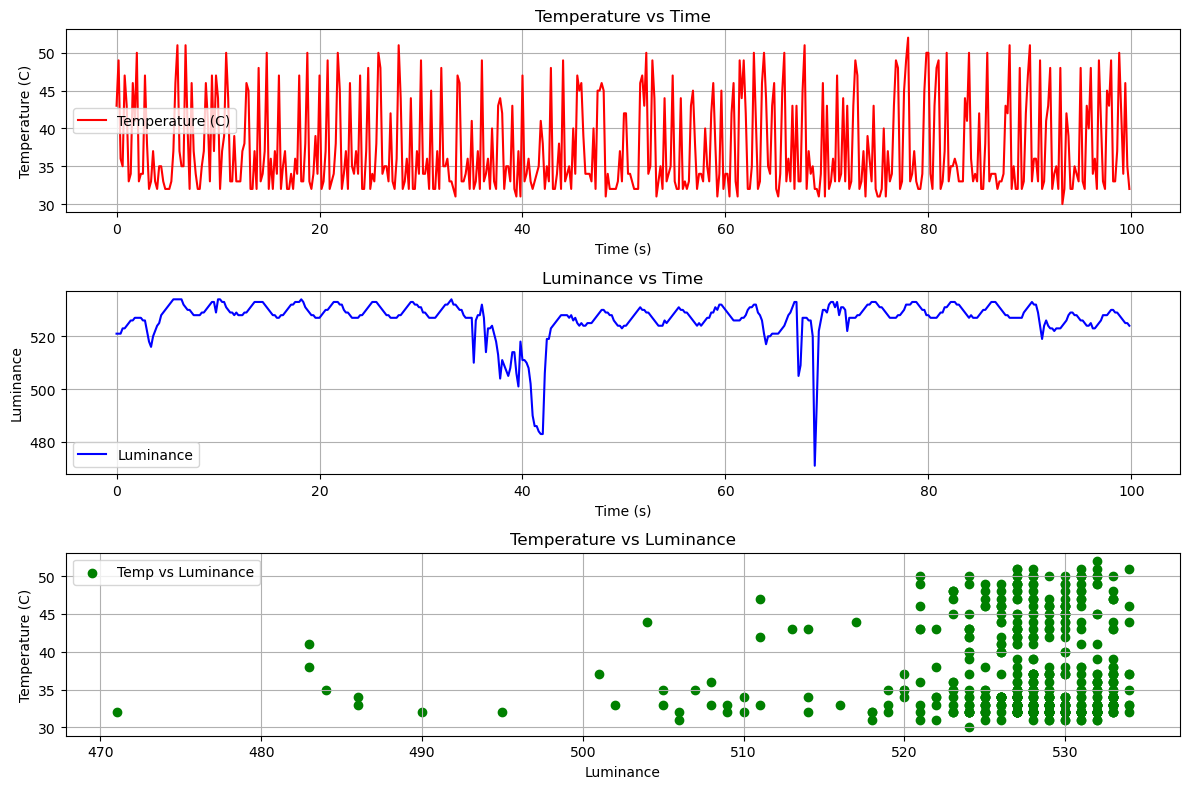

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("sensor_data.csv");

plt.figure(figsize=(12, 8))

# Plot 1: Temperature vs. Time
plt.subplot(3, 1, 1)
plt.plot(df['Time (s)'], df['Temperature (C)'], color='red', label='Temperature (C)')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Time')
plt.grid(True)
plt.legend()

# Plot 2: Luminance vs. Time
plt.subplot(3, 1, 2)
plt.plot(df['Time (s)'], df['Luminance'], color='blue', label='Luminance')
plt.xlabel('Time (s)')
plt.ylabel('Luminance')
plt.title('Luminance vs Time')
plt.grid(True)
plt.legend()

# Plot 3: Temperature vs. Luminance
plt.subplot(3, 1, 3)
plt.scatter(df['Luminance'], df['Temperature (C)'], color='green', label='Temp vs Luminance')
plt.xlabel('Luminance')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Luminance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## 2) Databases

For the databases part of this assignment, you will use the mimic-iii database from the laboratory session. Start by adding a few new tables to the database, using the SQL files included in the assignment's files. Open PGAdmin and connect to your mimic-iii database. **To properly load these tables, load the following files exactly and by the order presented.**

1) Run demographic.sql

2) Run lab_firstday.sql

You will now have to answer a few SQL questions.

**1.** Open the connection to your mimic-iii database. If you want, you can delete your credentials before submitting the assignment, but if you do so, please run the notebook first, for the results to be displayed.

In [1]:
!pip install psycopg2
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt

conn = psql.connect(host='localhost',
                    database='mimic-iii',
                    user='postgres',
                    password='',
                    port=5432)

cursor = conn.cursor()


cursor.execute("select version()")


data = cursor.fetchone()
print("Connection established to: ", data)

Connection established to:  ('PostgreSQL 17.2 on x86_64-windows, compiled by msvc-19.42.34433, 64-bit',)


**2.** Create a function that receives an SQL query and automatically opens a cursor, queries the database, extracts the columns, creates a pandas database, and closes the connections.

In [5]:
query = "SELECT * FROM public.admissions "

cursor.execute(query)

colnames = [desc[0] for desc in cursor.description]
data = cursor.fetchall()

#Closing the connection
conn.close()

admission_table = pd.DataFrame(data, columns = colnames)
admission_table

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,None,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaT,NaT,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,None,CATHOLIC,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,None,CATHOLIC,DIVORCED,WHITE,NaT,NaT,ALCOHOLIC HEPATITIS,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,41055,44083,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,ENGL,CATHOLIC,SINGLE,WHITE,2112-05-28 13:16:00,2112-05-28 17:30:00,PERICARDIAL EFFUSION,0,1
125,41070,44154,174245,2178-05-14 20:29:00,2178-05-15 09:45:00,2178-05-15 09:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,2178-05-14 17:37:00,2178-05-14 22:08:00,ALTERED MENTAL STATUS,1,1
126,41087,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,NaT,NaT,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
127,41090,44222,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2180-07-19 04:50:00,2180-07-19 08:23:00,BRADYCARDIA,0,1


**3.** Query the table admissions filtering for admission type as emergency and insurance as private.

In [10]:

newquery = "SELECT * FROM public.admissions WHERE admission_type = 'EMERGENCY' AND insurance = 'Private' "

conn = psql.connect(host='localhost',
                    database='mimic-iii',
                    user='postgres',
                    password='',
                    port=5432)
cursor = conn.cursor()


cursor.execute("select version()")

data = cursor.fetchone()
print("Connection established to: ", data)

cursor.execute(newquery)

colnames = [desc[0] for desc in cursor.description]
data = cursor.fetchall()

#Closing the connection
conn.close()

admission_table = pd.DataFrame(data, columns = colnames)
admission_table



Connection established to:  ('PostgreSQL 17.2 on x86_64-windows, compiled by msvc-19.42.34433, 64-bit',)


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaT,NaT,HEPATITIS B,1,1
1,12317,10067,160442,2130-10-06 01:34:00,2130-10-06 02:29:00,2130-10-06 02:29:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,UNOBTAINABLE,None,OTHER,2130-10-06 00:12:00,2130-10-06 01:30:00,S/P MOTORCYCLE ACCIDENT,1,1
2,12339,10088,149044,2107-05-12 18:00:00,2107-05-18 13:30:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,UNOBTAINABLE,UNKNOWN (DEFAULT),WHITE,NaT,NaT,UROSEPSIS,0,1
3,12341,10090,176805,2124-01-12 14:26:00,2124-01-14 19:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2124-01-12 11:56:00,2124-01-12 16:09:00,OVERDOSE,0,1
4,12349,10098,180685,2170-12-02 23:24:00,2170-12-03 15:55:00,2170-12-03 15:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,UNOBTAINABLE,None,OTHER,2170-12-02 22:45:00,2170-12-03 00:56:00,STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURIES,1,1
5,12357,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,None,CATHOLIC,MARRIED,WHITE,2161-09-14 14:45:00,2161-09-15 01:30:00,HEADACHE,0,1
6,12368,10117,187023,2138-06-05 17:23:00,2138-06-11 10:16:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,2138-06-05 11:42:00,2138-06-05 21:20:00,FEVER,0,1
7,12369,10117,105150,2138-11-09 18:08:00,2138-11-18 23:13:00,2138-11-18 23:13:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,2138-11-09 15:42:00,2138-11-09 20:42:00,FEVER,1,1
8,12381,10126,160445,2171-07-12 06:02:00,2171-08-16 12:00:00,2171-08-16 12:00:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,None,UNOBTAINABLE,SINGLE,WHITE,NaT,NaT,LIVER FAILURE,1,1
9,12382,10127,182839,2198-06-28 05:34:00,2198-07-20 14:56:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,None,NOT SPECIFIED,None,WHITE,2198-06-28 04:28:00,2198-06-28 05:52:00,S/P MOTOR VEHICLE ACCIDENT,0,1


**4.** Query the table admissions, filtering for the same conditions as the previous exercise (admission type as emergency and insurance as private). Join the "drgcodes" table on the admission ID. Display only the columns regarding the subject id, admission id, time of death, and description of the drug.

In [13]:
newquery = "SELECT * FROM public.admissions LEFT JOIN public.prescriptions ON public.admissions.subject_id = public.prescriptions.subject_id AND public.admissions.hadm_id = public.prescriptions.hadm_id WHERE admission_type = 'EMERGENCY' AND insurance = 'Private' "

conn = psql.connect(host='localhost',
                    database='mimic-iii',
                    user='postgres',
                    password='',
                    port=5432)
cursor = conn.cursor()


cursor.execute("select version()")

data = cursor.fetchone()
print("Connection established to: ", data)

cursor.execute(newquery)

colnames = [desc[0] for desc in cursor.description]
data = cursor.fetchall()

conn.close()

admission_table = pd.DataFrame(data, columns = colnames)
admission_table


Connection established to:  ('PostgreSQL 17.2 on x86_64-windows, compiled by msvc-19.42.34433, 64-bit',)


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
0,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,...,None,None,None,None,None,None,None,None,None,None
1,12317,10067,160442,2130-10-06 01:34:00,2130-10-06 02:29:00,2130-10-06 02:29:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,None,None,None,None,None,None,None,None,None,None
2,12339,10088,149044,2107-05-12 18:00:00,2107-05-18 13:30:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Private,...,Sodium Chloride 0.9% Flush,NACLFLUSH,None,0,Syringe,3,ml,0.6,SYR,IV
3,12339,10088,149044,2107-05-12 18:00:00,2107-05-18 13:30:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Private,...,Lisinopril,LISI5,000393,00310013039,5MG TAB,5,mg,1,TAB,NG
4,12339,10088,149044,2107-05-12 18:00:00,2107-05-18 13:30:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Private,...,Docusate Sodium (Liquid),DOCU100L,003017,51079033530,100MG UD CUP,100,mg,1,UDCUP,NG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,41092,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,None,CIPR400PM,015921,00085174102,400mg Premix Bag,400,mg,1,BAG,IV
2087,41092,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,None,CALG1I,001356,63323031110,1g/10mL Vial,4,gm,4,VIAL,IV
2088,41092,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,None,KCL20PM,045309,00338070341,20mEq/50mL Premix,20-60,mEq,1,BAG,IV
2089,41092,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,None,METR500PM,009588,00409781124,500mg Premix Bag,500,mg,1,BAG,IV


**5.1.** Obtain the dataset for this problem, by running the SQL query below.

In [2]:
newquery = "SELECT pivoted_lab.*," +\
                "gender as gender," +\
                "admission_age," +\
                "ethnicity_grouped as eth_grp," +\
                "hospital_expire_flag," +\
                "los_icu " +\
        "FROM demographics " +\
        "LEFT JOIN pivoted_lab " +\
        "ON demographics.icustay_id = pivoted_lab.icustay_id " +\
        "WHERE first_icu_stay = true"


conn = psql.connect(host='localhost',
                    database='mimic-iii',
                    user='postgres',
                    password='',
                    port=5432)
cursor = conn.cursor()


cursor.execute("select version()")

data = cursor.fetchone()
print("Connection established to: ", data)

cursor.execute(newquery)

colnames = [desc[0] for desc in cursor.description]
data = cursor.fetchall()



df = pd.DataFrame(data, columns = colnames)
df

Connection established to:  ('PostgreSQL 17.2 on x86_64-windows, compiled by msvc-19.42.34433, 64-bit',)


,subject_id,hadm_id,icustay_id,aniongap_min,aniongap_max,albumin_min,albumin_max,bands_min,bands_max,bicarbonate_min,...,sodium_max,bun_min,bun_max,wbc_min,wbc_max,gender,admission_age,eth_grp,hospital_expire_flag,los_icu
0,10006,142345,206504,12.0,20.0,2.7,3.4,NaN,NaN,29.0,...,139.0,9.0,11.0,4.6,7.8,F,70.0,black,0,1.0
1,10011,105331,232110,12.0,12.0,2.6,2.6,2.0,2.0,23.0,...,136.0,3.0,3.0,10.6,10.6,F,36.0,unknown,1,13.0
2,10013,165520,264446,13.0,13.0,NaN,NaN,13.0,13.0,29.0,...,138.0,32.0,32.0,13.8,16.2,F,87.0,unknown,1,2.0
3,10017,199207,204881,13.0,13.0,2.8,2.8,NaN,NaN,29.0,...,139.0,3.0,3.0,15.8,15.8,F,74.0,white,0,2.0
4,10019,177759,228977,20.0,46.0,3.2,3.2,NaN,NaN,10.0,...,141.0,31.0,53.0,3.7,6.8,M,49.0,white,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,44083,198330,286428,16.0,16.0,NaN,NaN,NaN,NaN,21.0,...,142.0,12.0,12.0,12.3,14.9,M,55.0,white,0,3.0
124,44154,174245,217724,15.0,15.0,NaN,NaN,NaN,NaN,19.0,...,142.0,16.0,21.0,12.2,17.1,M,300.0,white,1,0.0
125,44212,163189,239396,15.0,21.0,2.9,3.0,NaN,NaN,18.0,...,150.0,37.0,57.0,8.8,11.4,F,45.0,black,0,31.0
126,44222,192189,238186,11.0,15.0,NaN,NaN,NaN,NaN,22.0,...,135.0,21.0,24.0,9.3,9.9,M,73.0,white,0,1.0


**5.2.** Close the connection to your SQL server.

In [3]:
conn.close()

**5.3.** Prepare your dataset:

* Drop the ID columns of subject, admission and ICU stay.
* Drop columns with at least one NA value.
* Encode the categorical columns, the ethnicity and gender ('eth_grp', 'gender'). *Suggestion: use pd.get_dummies*
* Consider the column 'hospital_expire_flag' as the response and all remaining columns as the predictors.

In [4]:
from sklearn import preprocessing


df = df.drop(["subject_id", 'hadm_id', 'icustay_id'], axis='columns')
df = df.dropna(axis = 1)

le = preprocessing.LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['eth_grp'] = le.fit_transform(df['eth_grp'])

df

,bicarbonate_min,bicarbonate_max,creatinine_min,creatinine_max,chloride_min,chloride_max,glucose_min,glucose_max,hematocrit_min,hematocrit_max,...,sodium_max,bun_min,bun_max,wbc_min,wbc_max,gender,admission_age,eth_grp,hospital_expire_flag,los_icu
0,29.0,31.0,3.0,3.5,96.0,100.0,84.0,217.0,36.9,42.4,...,139.0,9.0,11.0,4.6,7.8,0,70.0,1,0,1.0
1,23.0,23.0,0.7,0.7,107.0,107.0,79.0,79.0,33.9,34.0,...,136.0,3.0,3.0,10.6,10.6,0,36.0,5,1,13.0
2,29.0,29.0,1.7,1.7,98.0,100.0,134.0,165.0,28.1,29.2,...,138.0,32.0,32.0,13.8,16.2,0,87.0,5,1,2.0
3,29.0,29.0,0.3,0.3,100.0,100.0,137.0,137.0,27.5,27.5,...,139.0,3.0,3.0,15.8,15.8,0,74.0,6,0,2.0
4,10.0,18.0,4.0,7.2,83.0,104.0,80.0,360.0,30.6,36.0,...,141.0,31.0,53.0,3.7,6.8,1,49.0,6,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,21.0,21.0,0.7,0.7,108.0,108.0,151.0,151.0,26.0,29.0,...,142.0,12.0,12.0,12.3,14.9,1,55.0,6,0,3.0
124,19.0,19.0,0.9,0.9,107.0,113.0,164.0,177.0,40.8,41.8,...,142.0,16.0,21.0,12.2,17.1,1,300.0,6,1,0.0
125,18.0,23.0,3.0,4.8,108.0,115.0,99.0,122.0,23.8,25.9,...,150.0,37.0,57.0,8.8,11.4,0,45.0,1,0,31.0
126,22.0,27.0,1.2,1.7,100.0,101.0,56.0,268.0,37.8,39.0,...,135.0,21.0,24.0,9.3,9.9,1,73.0,6,0,1.0


**6.** Fit the following tree-based classifiers to the dataset. For each method:

* Perform k-fold cross validation to evaluate the models. Consider 10 folds.

* Plot the ROC curves for each fold, along with the mean ROC curve.

* Calculate the mean AUC.

**a.** Decision tree.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = df.drop('hospital_expire_flag', axis = 1)
y = df['hospital_expire_flag']

X, y


(     bicarbonate_min  bicarbonate_max  creatinine_min  creatinine_max  \
 0               29.0             31.0             3.0             3.5   
 1               23.0             23.0             0.7             0.7   
 2               29.0             29.0             1.7             1.7   
 3               29.0             29.0             0.3             0.3   
 4               10.0             18.0             4.0             7.2   
 ..               ...              ...             ...             ...   
 123             21.0             21.0             0.7             0.7   
 124             19.0             19.0             0.9             0.9   
 125             18.0             23.0             3.0             4.8   
 126             22.0             27.0             1.2             1.7   
 127             15.0             24.0             0.6             0.8   
 
      chloride_min  chloride_max  glucose_min  glucose_max  hematocrit_min  \
 0            96.0         100.0

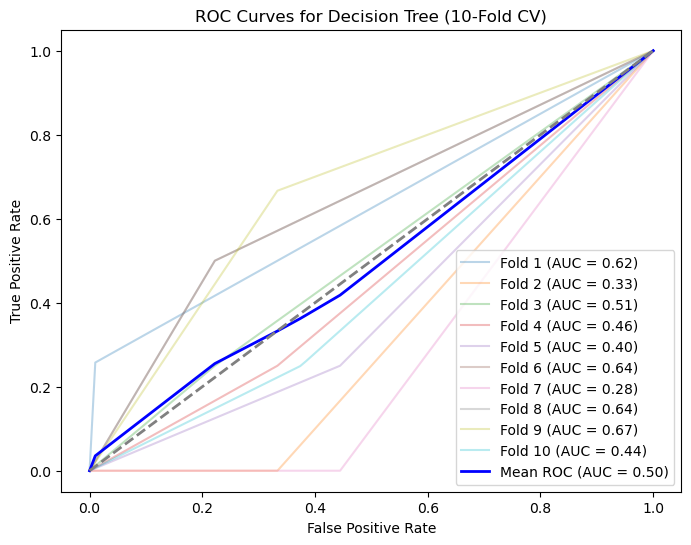

In [34]:

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


dt_model = DecisionTreeClassifier(random_state=42)


kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


tprs = []
mean_fpr = np.linspace(0, 1, 100)
aucs = []


for train_idx, test_idx in kf.split(X, y):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    

    dt_model.fit(X_train, y_train)
    
    y_proba = dt_model.predict_proba(X_test)[:, 1]
    

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    

    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  
mean_auc = auc(mean_fpr, mean_tpr)


plt.figure(figsize=(8, 6))
for i, tpr in enumerate(tprs):
    plt.plot(mean_fpr, tpr, alpha=0.3, label=f"Fold {i+1} (AUC = {aucs[i]:.2f})")

plt.plot(mean_fpr, mean_tpr, color="blue", label=f"Mean ROC (AUC = {mean_auc:.2f})", lw=2)


plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Decision Tree (10-Fold CV)")
plt.legend(loc="lower right")
plt.show()

**b.** Random forest

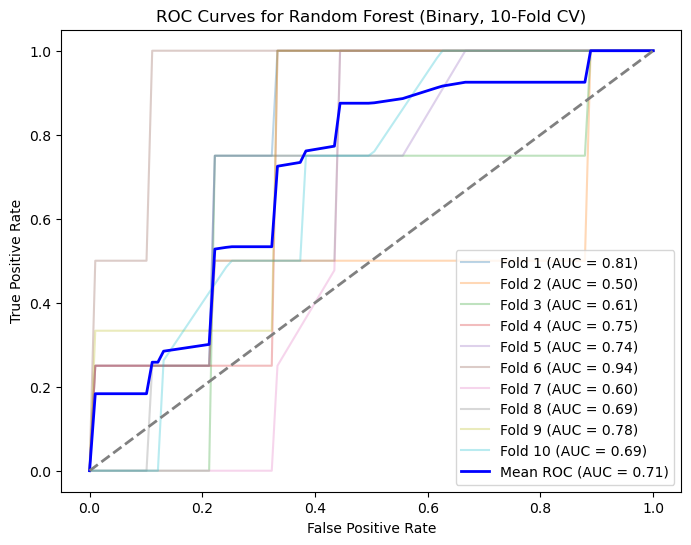

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


tprs = []
mean_fpr = np.linspace(0, 1, 100)
aucs = []


for train_idx, test_idx in kf.split(X, y):
   
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    

    rf_model.fit(X_train, y_train)
    

    y_proba = rf_model.predict_proba(X_test)[:, 1]
    
 
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    

    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  
mean_auc = auc(mean_fpr, mean_tpr)


plt.figure(figsize=(8, 6))
for i, tpr in enumerate(tprs):
    plt.plot(mean_fpr, tpr, alpha=0.3, label=f"Fold {i+1} (AUC = {aucs[i]:.2f})")


plt.plot(mean_fpr, mean_tpr, color="blue", label=f"Mean ROC (AUC = {mean_auc:.2f})", lw=2)


plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Random Forest (Binary, 10-Fold CV)")
plt.legend(loc="lower right")
plt.show()

**c.** Gradient Boosting

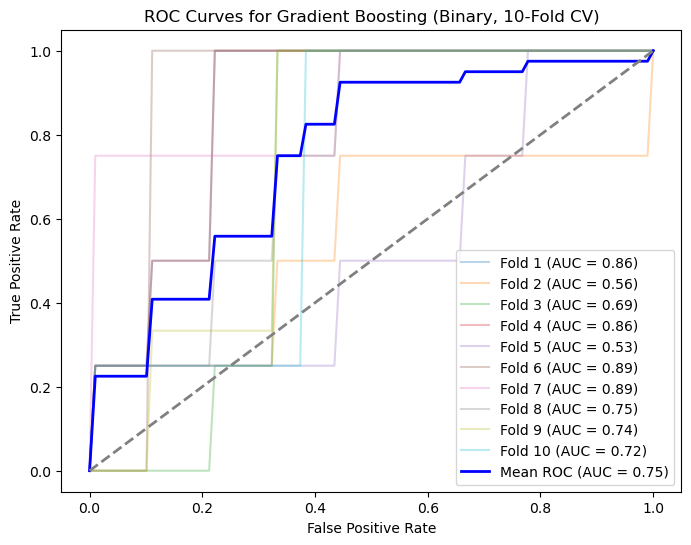

In [37]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)


kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


tprs = []
mean_fpr = np.linspace(0, 1, 100)
aucs = []

for train_idx, test_idx in kf.split(X, y):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    

    gb_model.fit(X_train, y_train)
    

    y_proba = gb_model.predict_proba(X_test)[:, 1]
    
   
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    

    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  
mean_auc = auc(mean_fpr, mean_tpr)


plt.figure(figsize=(8, 6))
for i, tpr in enumerate(tprs):
    plt.plot(mean_fpr, tpr, alpha=0.3, label=f"Fold {i+1} (AUC = {aucs[i]:.2f})")


plt.plot(mean_fpr, mean_tpr, color="blue", label=f"Mean ROC (AUC = {mean_auc:.2f})", lw=2)


plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Gradient Boosting (Binary, 10-Fold CV)")
plt.legend(loc="lower right")
plt.show()

**7.1.** Perform a grid search cross-validation on the Gradient boosting methods, changing the value of the learning rate (0.01 to 0.5) and the number of estimators (50-500). Consider the mean AUC of the folds as the performance measure.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer

gb_model = GradientBoostingClassifier(random_state=42)


param_grid = {
    "learning_rate": np.linspace(0.01, 0.5, 5),  
    "n_estimators": [50, 100, 200, 300, 400, 500]
}


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

auc_scorer = make_scorer(roc_auc_score, needs_proba=True)


grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring=auc_scorer,
    cv=cv,
    verbose=1,  
    n_jobs=-1   
)


grid_search.fit(X, y)


best_params = grid_search.best_params_
best_auc = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Mean AUC:", best_auc)

C:\Users\marti\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 400}
Best Mean AUC: 0.7857638888888888


**7.2.** Plot a scatterplot of the learning rate versus the number of estimators, with the mean AUC as the color gradient.

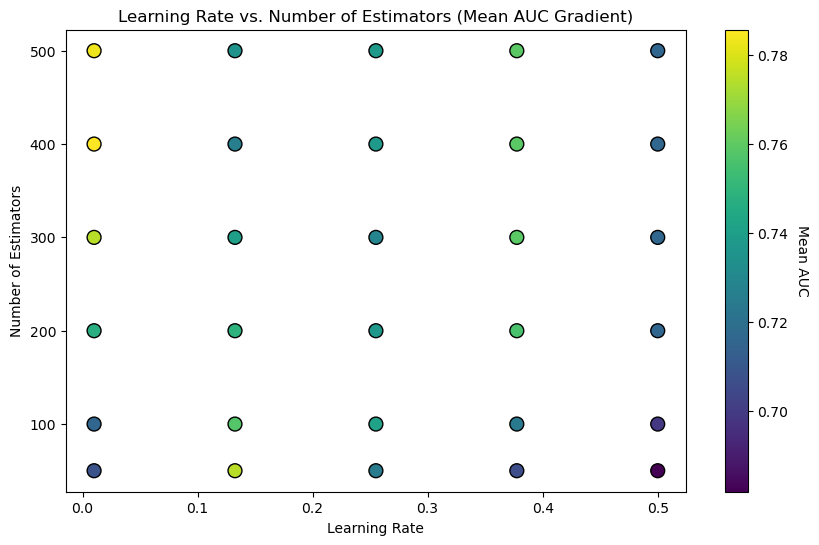

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results = grid_search.cv_results_


results_df = pd.DataFrame({
    "learning_rate": results["param_learning_rate"].data.astype(float),
    "n_estimators": results["param_n_estimators"].data.astype(int),
    "mean_auc": results["mean_test_score"] 
})


plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    results_df["learning_rate"],
    results_df["n_estimators"],
    c=results_df["mean_auc"],
    cmap="viridis",
    s=100,  
    edgecolor="k",  
)


cbar = plt.colorbar(scatter)
cbar.set_label("Mean AUC", rotation=270, labelpad=15)


plt.xlabel("Learning Rate")
plt.ylabel("Number of Estimators")
plt.title("Learning Rate vs. Number of Estimators (Mean AUC Gradient)")


plt.show()

**8.1.** Perform forward stepwise selection on the dataset. Use the best parameters of the gradient boosting method obtained in **7.1.**.

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np


best_params = grid_search.best_params_
print("Best Parameters from Grid Search:", best_params)


remaining_features = list(X.columns) 
selected_features = []  
best_auc = 0 
feature_scores = []  

while remaining_features:
    print(f"\nRemaining features: {remaining_features}")
    auc_scores = []  

    for feature in remaining_features:
    
        temp_features = selected_features + [feature]
        
    
        gb_model = GradientBoostingClassifier(**best_params, random_state=42)
        auc = np.mean(
            cross_val_score(gb_model, X[temp_features], y, scoring="roc_auc", cv=5)
        )
        auc_scores.append((feature, auc))
        print(f"Feature: {feature}, AUC: {auc:.4f}")

    best_feature, best_feature_auc = max(auc_scores, key=lambda x: x[1])
    print(f"\nBest feature this step: {best_feature}, AUC: {best_feature_auc:.4f}")
    
  
    if best_feature_auc > best_auc:
        best_auc = best_feature_auc
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        feature_scores.append((best_feature, best_auc))
        print(f"Selected Features: {selected_features}")
    else:
        print("No improvement. Stopping selection.")
        break

# Final Results
print("\nForward Stepwise Selection Complete.")
print("Selected Features:", selected_features)
print("Feature Scores (Step-by-Step AUC):", feature_scores)

Best Parameters from Grid Search: {'learning_rate': 0.01, 'n_estimators': 400}

Remaining features: ['bicarbonate_min', 'bicarbonate_max', 'creatinine_min', 'creatinine_max', 'chloride_min', 'chloride_max', 'glucose_min', 'glucose_max', 'hematocrit_min', 'hematocrit_max', 'platelet_min', 'platelet_max', 'potassium_min', 'potassium_max', 'sodium_min', 'sodium_max', 'bun_min', 'bun_max', 'wbc_min', 'wbc_max', 'gender', 'admission_age', 'eth_grp', 'los_icu']
Feature: bicarbonate_min, AUC: 0.6210
Feature: bicarbonate_max, AUC: 0.6234
Feature: creatinine_min, AUC: 0.3644
Feature: creatinine_max, AUC: 0.4189
Feature: chloride_min, AUC: 0.3975
Feature: chloride_max, AUC: 0.5221
Feature: glucose_min, AUC: 0.4932
Feature: glucose_max, AUC: 0.4343
Feature: hematocrit_min, AUC: 0.4650
Feature: hematocrit_max, AUC: 0.4198
Feature: platelet_min, AUC: 0.4857
Feature: platelet_max, AUC: 0.5031
Feature: potassium_min, AUC: 0.4460
Feature: potassium_max, AUC: 0.5042
Feature: sodium_min, AUC: 0.5629
Fea

**8.2.** Compare and comment the results from **8.1.** with the features importance obtained through the grid search of queastion **7.1.**.

The forward stepwise selection identified admission_age and wbc_max as the most impactful features based on their incremental improvement in AUC, while feature importance from the Gradient Boosting model provides a global ranking of all features based on their contribution to the model's performance. If these selected features align with highly ranked features in the feature importance analysis, it validates their significance. 

## 3) Theoretical Questions

**1.** Consider a dataset where best subset, forward stepwise and backward stepwise selection will be performed. For each of the 3 approaches, we obtain $p+1$ models, $p$ being the total number of predictors. This means that each approach has a model with 0 predictors, one with 1 predictor, one with 2 predictor, up until one model with $p$ predictors. Answer and justify the following questions:

**a)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest training RSS?

The best subset selection model with 
𝑘
 predictors will have the smallest training RSS because it examines all possible combinations of 
𝑘 predictors and selects the one that minimizes the training RSS, whereas forward and backward stepwise selection are constrained by their sequential selection processes and may not explore all combinations.

**b)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest test RSS?

The model with 
𝑘
predictors that has the smallest test RSS depends on the data, but generally, no approach consistently guarantees the smallest test RSS as it depends on the balance between bias and variance for each method.

**c)** Evaluate the following statements with *true* or *false*. Justify your answers.

    i. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.

True.
In forward stepwise selection, predictors are added sequentially at each step, meaning the 
𝑘
-variable model is always a subset of the 
(k+1)-variable model, as no previously selected predictors are removed.

    ii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by backward stepwise selection.


False.
In backward stepwise selection, predictors are removed sequentially from the full model, so the 
k-variable model is not necessarily a subset of the 
(k+1)-variable model. A predictor excluded in the 
(k+1)-variable model could still remain in the 
k-variable model.

    iii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.

True.
In forward stepwise selection, predictors are added sequentially, while in backward stepwise selection, predictors are removed from the full model. Consequently, the 
k-variable model from backward selection, which is derived by removing predictors, will always include predictors that are part of the (k+1)-variable model from forward selection.

    iv. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.

False.
Forward stepwise selection adds predictors sequentially to build the model, while backward stepwise selection removes predictors starting from the full model. As a result, the k-variable model from forward selection is not guaranteed to be a subset of the (k+1)-variable model from backward selection because the two methods may select different predictors based on their criteria.

    v. The predictors in the k-variable model identified by best subset selection are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.

False.
Best subset selection evaluates all possible combinations of predictors for each model size k. Therefore, the predictors in the k-variable model are not necessarily a subset of those in the (k+1)-variable model, as different combinations of predictors might minimize the RSS for different values of k.

**2.** Ridge regression tends to give similar coefficient values to correlated variables, whereas lasso regression may give substantially different coefficients to correlated variables. This questions explores this property in a simplified setting.

Suppose that $n=2$, $p=2$, $x_{11} = x_{12}$, $x_{21} = x_{22}$. Moreover, suppose that $y_1 + y_2 = 0$ and $x_{11} + x_{21} = 0$ and $x_{12} + x_{22} = 0$, meaning that the estimate for the intercept in a least squares, ridge regression, or lasso regression is zero: $\hat{\beta} = 0$.

**a)** Write the ridge regression optimization problem in this setting.

The ridge regression optimization problem in this setting minimizes the sum of the squared residuals from the least squares loss, along with a regularization term that penalizes the squared values of the coefficients. Specifically, the objective function to minimize is:

2 * (1 - β₁ - β₂)² + λ * (β₁² + β₂²)

where the first term represents the squared differences between the observed values and the model predictions, and the second term is the ridge penalty that shrinks the coefficients β₁ and β₂ to prevent overfitting.

**b)** Prove that in this setting, the ridge regression coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.

To prove that the ridge regression coefficient estimates satisfy $ \beta_1 = \beta_2 $, we start with the objective function $ J(\beta_1, \beta_2) = 2(1 - \beta_1 - \beta_2)^2 + \lambda (\beta_1^2 + \beta_2^2) $. By expanding and taking the partial derivatives with respect to $ \beta_1 $ and $ \beta_2 $, we obtain two symmetric equations:

$$
\frac{\partial J}{\partial \beta_1} = -4 + 2(2 + \lambda)\beta_1 + 4\beta_2 = 0
$$
and
$$
\frac{\partial J}{\partial \beta_2} = -4 + 2(2 + \lambda)\beta_2 + 4\beta_1 = 0
$$

Solving these equations shows that $ \beta_1 = \beta_2 $, as the system reduces to:

$$
\lambda(\beta_1 - \beta_2) = 0
$$

Since $ \lambda \neq 0 $, it follows that $ \beta_1 = \beta_2 $, proving the desired result.


**c)** Write the lasso regression optimization problem in this setting.


The lasso regression optimization problem in this setting can be written as:

$$
\min_{\beta_1, \beta_2} \left[ 2(1 - \beta_1 - \beta_2)^2 + \lambda (|\beta_1| + |\beta_2|) \right]
$$

Here, the first term $ 2(1 - \beta_1 - \beta_2)^2 $ represents the sum of squared residuals (least squares loss), and the second term $ \lambda (|\beta_1| + |\beta_2|) $ is the lasso penalty that adds the absolute values of the coefficients $ \beta_1 $ and $ \beta_2 $, which encourages sparsity (i.e., setting some coefficients to zero). The parameter $ \lambda $ controls the strength of the penalty.

**d)** Prove that in this setting, the lasso regression coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique, meaning that there are many possible solutions to the optimization problem in (c). Describe these solutions.


To prove that in this setting, the lasso regression coefficients $ \beta_1 $ and $ \beta_2 $ are not unique, we analyze the lasso regression optimization problem:

$$
\min_{\beta_1, \beta_2} \left[ 2(1 - \beta_1 - \beta_2)^2 + \lambda (|\beta_1| + |\beta_2|) \right]
$$

The presence of the lasso penalty term $ \lambda (|\beta_1| + |\beta_2|) $ introduces a non-differentiable point at $ \beta_1 = 0 $ and $ \beta_2 = 0 $. This causes the optimization problem to have multiple solutions. Specifically, the solutions occur when $ \beta_1 = \beta_2 $, and both coefficients can be simultaneously zero, or both can take non-zero values while still satisfying the optimization condition.

For example, when $ \beta_1 = \beta_2 $, the objective function simplifies, and the solution can be obtained by solving for $ \beta_1 $ (and $ \beta_2 $), leading to the non-uniqueness of solutions. This is because the solution path can be constrained to a region where $ \beta_1 $ and $ \beta_2 $ move together, thus generating multiple equivalent solutions that satisfy the same objective function.

These solutions correspond to different values of $ \beta_1 $ and $ \beta_2 $ that are symmetric and fulfill the lasso penalty's constraint. As a result, the optimization problem has many possible solutions, where the coefficients can take different values while maintaining equivalence in terms of the overall penalty and loss.

**3.** Draw an example of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions R1, R2,..., the cutpoints t1, t2,..., and so forth.

If you prefer you can draw it by hand or in any software and use a scan of it.

**4.** In 2 dimensions, a linear decision boundary takes the form $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$. Consider a nn-linear decision boundary:

**a)** Sketch the curve

$$(1 + X_1)^2 + (2 - X_2)^2 = 4$$

Additionally, indicate on your sketch the set of points that verify the condition

$$(1 + X_1)^2 + (2 - X_2)^2 > 4$$

and the condition

$$(1 + X_1)^2 + (2 - X_2)^2 \leq 4$$

**b)** Suppose that a classifier assigns an observation to the blue class if $(1 + X_1)^2 + (2 - X_2)^2 > 4$ and to the red class otherwise. To what class are the following observations classified? (0,0), (-1,1), (2,2), (3,8)

**c)** Prove that while the decision boundary in (b) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.

# 4) Laboratory Questions

What are the advantages and disadvantages of relational dabases versus graph databases, and when should one type be preferred over the other?